In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('heart_disease_prediction.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.shape

(303, 14)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

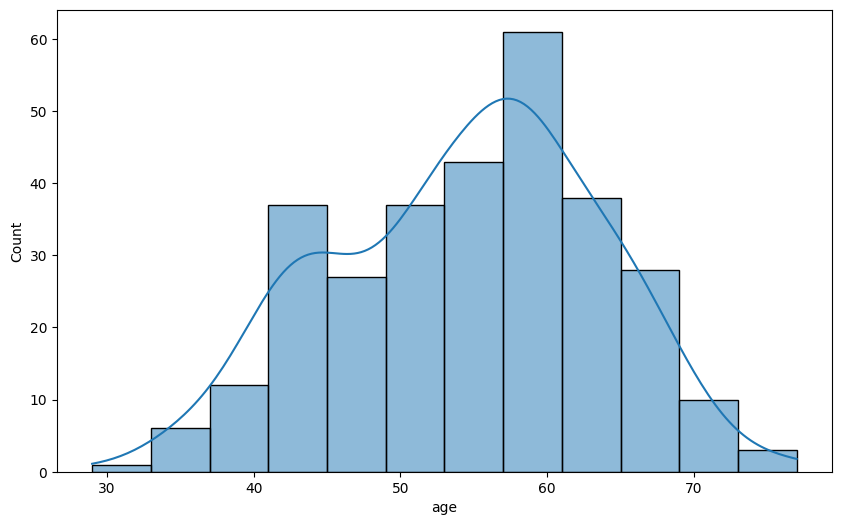

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(x='age', data=df,kde=True)
plt.show()

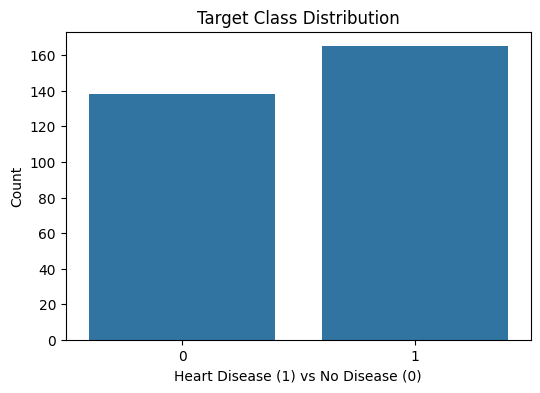

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Heart Disease (1) vs No Disease (0)')
plt.ylabel('Count')
plt.show()

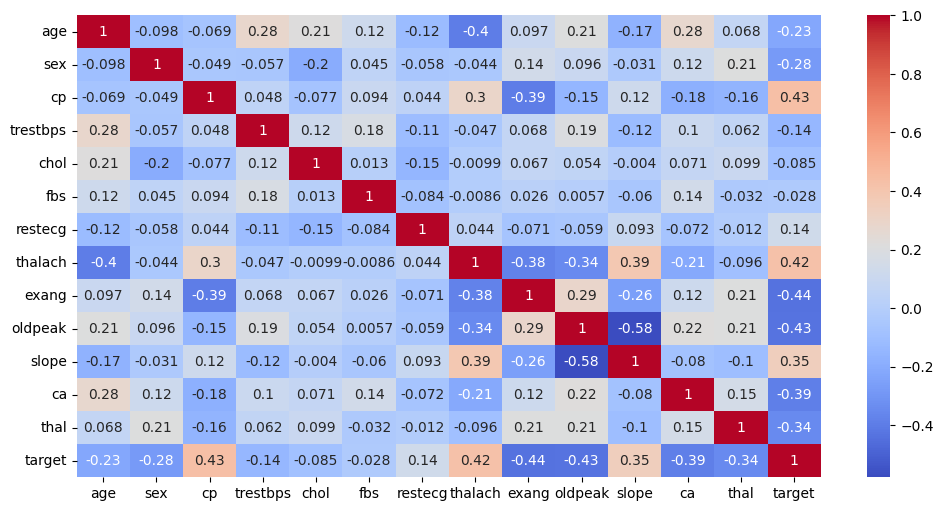

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
X = df.iloc[:,:13].values
y = df["target"].values

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
model = Sequential()
model.add(Dense(activation = "relu", input_dim = 13,
                     units = 8, kernel_initializer = "uniform"))
model.add(Dense(activation = "relu", units = 12,
                     kernel_initializer = "uniform"))
model.add(Dense(activation = "sigmoid", units = 1,
                     kernel_initializer = "uniform"))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
                   metrics = ['accuracy'] )

In [28]:
model.fit(X_train , y_train , batch_size = 8 ,epochs = 100  )

Epoch 1/100


27/27 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5519
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.6934
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.8160
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.8443
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.8538
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8585
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8632
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8679
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8585
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8632
Epoch 1

In [30]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 4ms/step


In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[35,  9],
       [ 4, 43]], dtype=int64)

<Figure size 500x400 with 0 Axes>

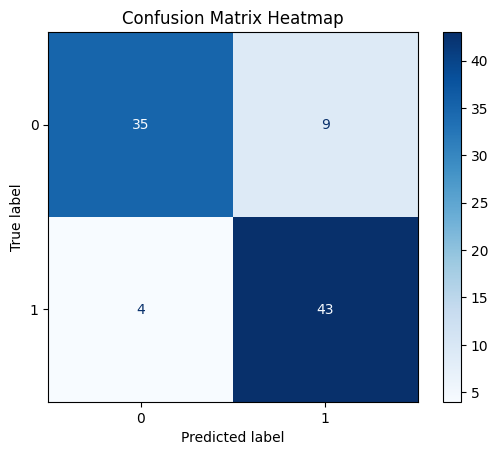

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [36]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

85.71428571428571


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics
precision = precision_score(y_test, y_pred) # How many predicted “disease” cases were actually correct
recall = recall_score(y_test, y_pred) #How many real “disease” cases the model found 
f1 = f1_score(y_test, y_pred) #Balance between the two

# Display results
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")
print(f"F1-Score  : {f1*100:.2f}%")

Precision : 82.69%
Recall    : 91.49%
F1-Score  : 86.87%
